<a href="https://colab.research.google.com/github/donghuna/AI-Expert/blob/main/%5BSamsung_AI_Expert_Day2%5D_L1_Bayes_Classifier_(Student).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bayes Classifier
The Bayes Classifier is a fundamental probabilistic model in machine learning that applies Bayes' Theorem to predict the category or class of a given data point. It leverages prior knowledge along with observed data to calculate the probability of each class, ultimately assigning the data point to the class with the highest probability. This approach is particularly powerful in scenarios where the relationships between features and the class label are probabilistic and uncertain. The Bayes Classifier is known for its simplicity, computational efficiency, and effectiveness in a variety of applications, including text classification, spam filtering, and sentiment analysis.

Contents of this section:
*   Implementing simplified rule-base spam classifier (recap)
*   Implementing binary naive Bayes classifier (no smoothing)
*   Implementing binary naive Bayes classifier (Laplace smoothing)
*   Observe the effect of Laplace smoothing

### Setting Environment

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
!wget -O spam_dataset.tsv https://drive.google.com/uc?id=1GaUS8wMlWQwqhgCX2wsvhOkQ8_Uw_x2r

--2024-06-20 12:29:55--  https://drive.google.com/uc?id=1GaUS8wMlWQwqhgCX2wsvhOkQ8_Uw_x2r
Resolving drive.google.com (drive.google.com)... 142.250.125.138, 142.250.125.102, 142.250.125.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.125.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GaUS8wMlWQwqhgCX2wsvhOkQ8_Uw_x2r [following]
--2024-06-20 12:29:55--  https://drive.usercontent.google.com/download?id=1GaUS8wMlWQwqhgCX2wsvhOkQ8_Uw_x2r
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5500631 (5.2M) [application/octet-stream]
Saving to: ‘spam_dataset.tsv’

spam_dataset.tsv    100%[===================>]   5.25M  --.-KB/s    in 0.1s    

2024-06-20 12:29:56 (53

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spam_dataset.tsv', sep="\t")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
X = df['text']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
list(zip(X_train, y_train))[:2]

## Practice: Spam Filtering

In [ ]:
import re
from collections import defaultdict, Counter
from nltk.corpus import stopwords

def tokenize(text):
    output =  re.findall(r'\b\w+\b', text.lower())
    # remove stopwords
    output = [word for word in output if word not in stopwords.words('english')]
    return output


# Example
print(tokenize("Win a free iPhone now"))  # Output: ['win', 'a', 'free', 'iphone', 'now']

['win', 'a', 'free', 'iphone', 'now']


In [ ]:
list(zip(X_train, y_train))[:2]

[('Subject: april activity surveys\r\nwe are starting to collect data for april . the attached survey drives your\r\ncosts from your activities to the commercial teams . please select your rcs ,\r\nand fill in the driver quantity for the requested driver for the month of\r\nfebruary . please fill out the attached activity driver survey with april\r\nnumbers for your rc by end of day thursday , may 4 th .\r\nif your group currently generates a standard report that captures the\r\nsurveyed data , please send the report to me , and put me on your recipient\r\nlist beginning next month . this will eliminate your need to fill out this\r\nsurvey every month . if you would like us to collect this information from\r\nsomeone within your team beginning next month , let me know .\r\nplease contact me or lisa cousino x 3 - 6343 if you are unable to complete the\r\nsurvey within the allotted time .\r\nthanks ,\r\nshari\r\n3 - 3859',
  0),
 ("Subject: message subject\r\nhey i ' am julie ^ _ ^ . i j

### Rule-based Classifier and Evaluation


In [ ]:
def keyword_classify(document, keywords=['million','millions']):
    words = tokenize(document)
    # DIY
    # return 1 if the words include keyword, 0 otherwise

In [ ]:
example = 'Congratulations! You won a million dollars!'
result = keyword_classify(example)
if result == 1:
    print("Spam")
else:
    print("Not Spam")

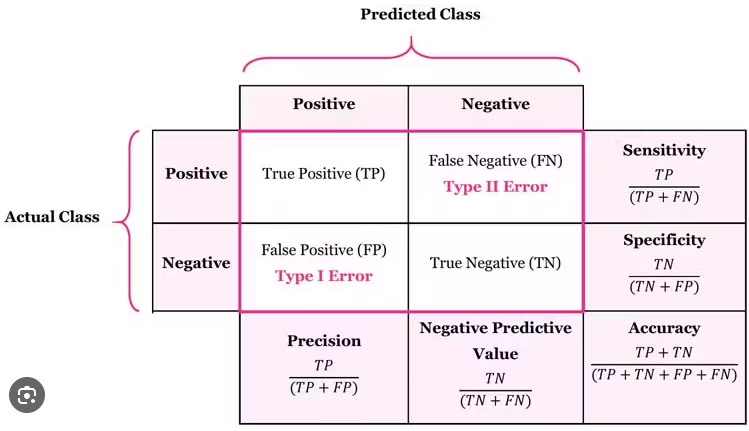

In [ ]:
def evaluate_classification_result(y_true, y_pred):
  # DIY
  # (1) Compute TP, TN, FP, FN
  # (2) Compute and print Accuracy Precision, Recall, F1
  # (3) Print Confusion Matrix
  # Hint - access i-th elements of each input with y_pred[i], y_true.iloc[i]
  true_positive = 0
  false_positive = 0
  true_negative = 0
  false_negative = 0

  # Your code here

  # Accuracy
  accuracy = None # Your code here
  print("Accuracy:", accuracy)

  # Precision
  precision = None # Your code here
  print("Precision:", precision)

  # Recall
  recall = None # Your code here
  print("Recall:", recall)

  # F1
  f1 = None # Your code here
  print("F1:", f1)

  # Confusion Matrix
  print("Confusion Matrix:")
  print("Pred\t0\t1")
  print("Actual")
  print("0\t", true_negative, "\t", false_positive)
  print("1\t", false_negative, "\t", true_positive)
  return accuracy, precision, recall, f1

In [ ]:
# Inference on test set
y_pred = [keyword_classify(text,keywords=['million','millions']) for text in X_test]
acc_rule, prec_rule, rec_rule, f1_rule = evaluate_classification_result(y_test, y_pred)

Accuracy: 73.52657004830918
Precision: 85.18518518518519
Recall: 7.849829351535837
F1: 14.375000000000002
Confusion Matrix:
Predicted    0   1
Actual            
0          738   4
1          270  23


### Naive Bayes (without smoothing)
The Naive Bayes classifier is a specific type of Bayes Classifier that makes a strong assumption: it assumes that the features of a data point are conditionally independent given the class label. Despite this "naive" assumption, which rarely holds true in real-world scenarios, the Naive Bayes classifier often performs remarkably well in practice. It is particularly well-suited for high-dimensional data and is widely used in text classification tasks such as email spam detection and document categorization.

In [ ]:
def train_naive_bayes(data):
    class_counts = Counter() # Counter extends dict, providing useful methods for counting word occurence
    word_counts = defaultdict(Counter)
    vocab = set()

    for text, label in data:
        class_counts[label] += 1
        words = tokenize(text)
        for word in words:
            word_counts[label][word] += 1
            vocab.add(word)

    return class_counts, word_counts, vocab

data = list(zip(X_train, y_train))
class_counts, word_counts, vocab = train_naive_bayes(data)
print(class_counts)
print(word_counts)
print(vocab)

Counter({0: 2930, 1: 1206})
defaultdict(<class 'collections.Counter'>, {0: Counter({'the': 14641, 'to': 11973, 'ect': 10729, 'for': 6270, 'and': 6223, 'hou': 5622, 'enron': 5055, 'subject': 5036, 'a': 4819, 'on': 4799, 'of': 4513, 'you': 4297, 'i': 4095, 'is': 3875, 'this': 3806, 'in': 3641, '2000': 3401, 'be': 2996, 'will': 2753, 'that': 2746, 'have': 2525, 'from': 2523, 'we': 2512, 'at': 2398, 'com': 2322, 'gas': 2232, 'deal': 2189, 'please': 2164, 'if': 2063, 'with': 2001, 'am': 1872, 'hpl': 1863, 'meter': 1849, 'it': 1845, 'by': 1833, 'cc': 1824, 'pm': 1813, 'are': 1740, 's': 1718, 'your': 1647, 'me': 1621, '2001': 1607, '1': 1559, '_': 1541, 'as': 1535, 'not': 1504, '00': 1487, '000': 1485, 'daren': 1479, 'thanks': 1425, '10': 1409, 'or': 1398, '01': 1364, 're': 1352, 'corp': 1336, '3': 1307, 'd': 1259, '2': 1154, 'can': 1150, 'know': 1138, 'any': 1131, 'was': 1102, '11': 1032, 'e': 1018, 'j': 1015, 'mmbtu': 1014, 'forwarded': 1008, 'need': 968, '03': 928, '12': 927, 'has': 927, '

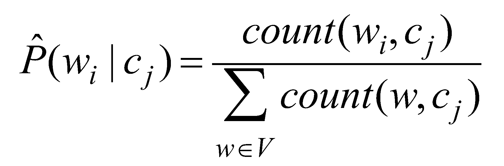

In [ ]:
def calculate_probabilities_ns(class_counts, word_counts, vocab):
    total_docs = sum(class_counts.values())
    class_probs = {label: count / total_docs for label, count in class_counts.items()}
    word_probs = defaultdict(dict)

    for label, words in word_counts.items():
        # DIY
        # compute conditional probability for each world: P(w|c)
        # word_probs[label][word] = (condition probability)
        # Your code here
        pass

    return class_probs, word_probs

In [ ]:
class_probs_ns, word_probs_ns = calculate_probabilities_ns(class_counts, word_counts, vocab)

In [ ]:
# bar plot for class_probs
plt.bar(["0","1"], [class_probs_ns[0], class_probs_ns[1]])
plt.show() # class imbalance!!

Now that we have P(w|c) for each class c and word w, we can examine the strongest predicting factors.

In [ ]:
# Top-15 words for Spam (Class 1)
word_probs_spam = sorted(list(word_probs_ns[1].items()), key=lambda x: x[1], reverse=True)
top_spam_word = word_probs_spam[:15]
for word, prob in top_spam_word:
    print(prob,'\t',word)

In [ ]:
# Top-15 words for Ham (Class 0)
word_probs_ham = sorted(list(word_probs_ns[0].items()), key=lambda x: x[1], reverse=True)
top_ham_word = word_probs_ham[:15]
for word, prob in top_ham_word:
    print(prob,'\t',word)

In [ ]:
# Top-15 predictors: words with largest P(w|spam) - P(w|ham)
# DIY
# diff_word_probs is a list of tuple (word, prob diff)
diff_word_probs = None # Your code here
top_diff_word = sorted(diff_word_probs, key=lambda x: x[1], reverse=True)

for word, prob in top_diff_word[:15]:
    print(prob,'\t',word)

Now, let's implement the classification with conditional probabilities.

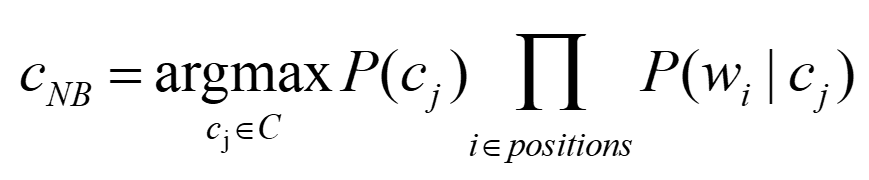

In [ ]:
def classify_ns(document, class_probs, word_probs, vocab):
    words = tokenize(document)
    scores = {label: class_probs[label] for label in class_probs}

    for label in scores:
        for word in words:
            # DIY
            # compute score for each label, using word_probs
            # hint: you should handle the edge case where 'word' is not in our vocabulary (i.e. unseen word)
            pass

    return max(scores, key=scores.get)

In [ ]:
# Example
result = classify_ns("Win a free coffee now", class_probs_ns, word_probs_ns, vocab)
if result == 0:
    print("Not Spam")
else:
    print("Spam")

Spam


In [ ]:
# Inference on test set
y_pred_ns = [classify_ns(text, class_probs_ns, word_probs_ns, vocab) for text in X_test]
acc_ns, prec_ns, rec_ns, f1_ns = evaluate_classification_result(y_test, y_pred_ns)

Accuracy: 80.8695652173913
Precision: 97.02970297029702
Recall: 33.44709897610921
F1: 49.74619289340101
Confusion Matrix:
Predicted    0   1
Actual            
0          739   3
1          195  98


### Naive Bayes with Laplace smoothing

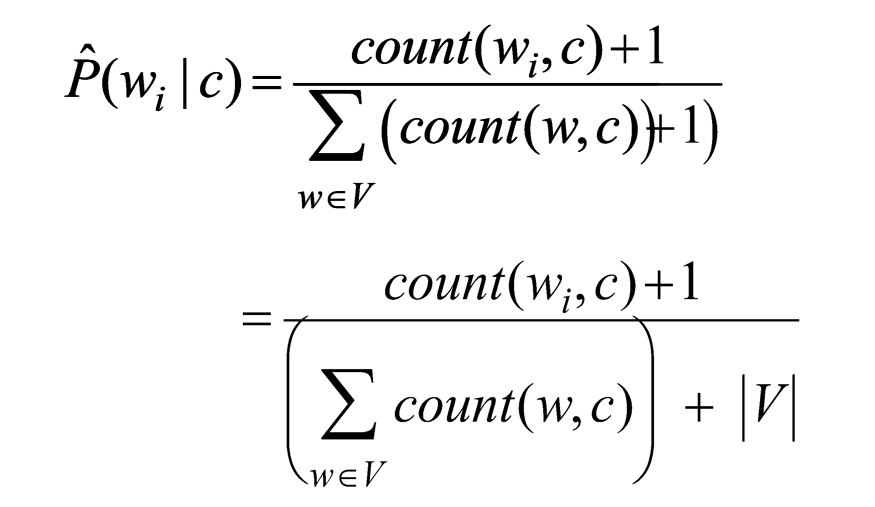

In [ ]:
def calculate_probabilities(class_counts, word_counts, vocab):
    total_docs = sum(class_counts.values())
    class_probs = {label: count / total_docs for label, count in class_counts.items()}
    word_probs = defaultdict(dict)

    for label, words in word_counts.items():
        total_words = sum(words.values())
        # DIY
        # implement laplace smoothing
        pass

    return class_probs, word_probs

In [ ]:
def classify(document, class_probs, word_probs, vocab):
    words = tokenize(document)
    scores = {label: class_probs[label] for label in class_probs}

    # DIY
    # compute score for each label, using laplace smoothing
    for label in scores:
      pass

    return max(scores, key=scores.get)

In [ ]:
# Inference on test set
class_probs_ls, word_probs_ls = calculate_probabilities(class_counts, word_counts, vocab)
y_pred_ls = [classify(text, class_probs_ls, word_probs_ls, vocab) for text in X_test]
acc_ls, prec_ls, rec_ls, f1_ls = evaluate_classification_result(y_test, y_pred_ls)

Accuracy: 85.89371980676329
Precision: 96.81528662420382
Recall: 51.877133105802045
F1: 67.55555555555554
Confusion Matrix:
Predicted    0    1
Actual             
0          737    5
1          141  152


### Visualization

In [ ]:
# visualize the results
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i],2))

# compare accuracy
x = ['Rule-based', 'Naive Bayes (NB)', 'NB + Laplace smoothing']
y = [acc_rule, acc_ns, acc_ls]
plt.bar(x, y)
addlabels(x, y)
plt.show()

In [ ]:
# compare precision
x = ['Rule-based', 'Naive Bayes (NB)', 'NB + Laplace smoothing']
y = [prec_rule, prec_ns, prec_ls]
plt.bar(x, y)
addlabels(x, y)
plt.show()

In [ ]:
# compare recall
x = ['Rule-based', 'Naive Bayes (NB)', 'NB + Laplace smoothing']
y = [rec_rule, rec_ns, rec_ls]
plt.bar(x, y)
addlabels(x, y)
plt.show()

In [ ]:
# compare f1
x = ['Rule-based', 'Naive Bayes (NB)', 'NB + Laplace smoothing']
y = [f1_rule, f1_ns, f1_ls]
plt.bar(x, y)
addlabels(x, y)
plt.show()

### Naive Bayes with Scikit-Learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
vectorizer.vocabulary_

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

y_pred_mnb = mnb.predict(X_test_vec)

accuracy_mnb = accuracy_score(y_test, y_pred_mnb) * 100
precision_mnb = precision_score(y_test, y_pred_mnb, average='binary') * 100
recall_mnb = recall_score(y_test, y_pred_mnb, average='binary') * 100
f1_mnb = f1_score(y_test, y_pred_mnb, average='binary') * 100
conf_matrix = confusion_matrix(y_test, y_pred_mnb)

print(f'MultinomialNB Accuracy: {accuracy_mnb:.2f}%')
print(f'MultinomialNB Precision: {precision_mnb:.2f}%')
print(f'MultinomialNB Recall: {recall_mnb:.2f}%')
print(f'MultinomialNB F1 Score: {f1_mnb:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

# There is performance gap
# Remember that we used simplified tokenization above (split by space)